# Reshaping DataFrames

Files needed = ('dogs.csv', 'WEOOct2021all.csv', 'zillow.csv')

We are learning how to deal with complex datasets in pandas. We began by tackling the multiIndex and now we turn to panel data and its various representations.  

Panel data have (at least) three dimensions, for example, a panel might record

1. several variables (income, age, spending on gasoline)
2. regarding several people
3. over time

The multiIndex gives us a natural way to handle this data. In this notebook, we work on ways to get our datasets into shapes that are amenable to analysis. 

Reshaping is important. 

A standard structure for a DataFrame has **observations as rows and columns are variables**. Many methods expect DataFrames to be organized this way but raw data are often not organized in this manner. This DataFrame structure is often referred to as *tidy data*. [This](https://www.jstatsoft.org/article/view/v059i10) article by Wickham lays out the ideas. The first three sections are great reading. The rest of the paper shows how to tidy up data in R. We can do the same things in python. With enough suffering, you can do it in STATA, too. 

In [1]:
import pandas as pd                 # load pandas and shorten it to pd
import datetime as dt               # load datetime and shorten it to dt
import matplotlib.pyplot as plt     # for making figures
import seaborn as sns

## Some panel data
Load the 'dogs.csv' file. The different dimensions of the data are: **variables** (walks, snacks); **dogs** (Buster, Su, Jax); and  **time**. The column **value** are the data associated with the dog-variable-time triplet. 
 
\[For reference, here are [Buster and Su](http://badgerdata.org/images/best_dogs.jpg) and [Jax](http://badgerdata.org/images/jax.jpg) the wild dog.\] 

In [2]:
# load a data file with the number of walks and snacks my dogs have had 

dogs = pd.read_csv('dogs.csv') 
dogs

dog     var       time  value
0   Buster   walks  10/1/2018      2
1   Buster   walks  10/2/2018      2
2   Buster  snacks  10/1/2018      4
3   Buster  snacks  10/2/2018      3
4   Buster  snacks  10/3/2018      4
5   Buster  snacks  10/4/2018      5
6       Su   walks  10/1/2018      2
7       Su   walks  10/2/2018      2
8       Su   walks  10/3/2018      2
9       Su  snacks  10/1/2018      3
10      Su  snacks  10/2/2018      4
11      Su  snacks  10/3/2018      4
12  Buster   walks  10/4/2018      2
13  Buster   walks  10/5/2018      3
14  Buster   walks  10/6/2018      1
15  Buster   walks  10/7/2018      3
16  Buster  snacks  10/5/2018      4
17  Buster  snacks  10/6/2018      3
18  Buster  snacks  10/7/2018      2
19      Su   walks  10/5/2018      2
20      Su   walks  10/7/2018      1
21      Su  snacks  10/4/2018      3
22      Su  snacks  10/5/2018      3
23      Su  snacks  10/6/2018      4
24      Su  snacks  10/7/2018      2
25      Su   walks  10/4/2018      3
26      Su   walks  10/6/2018      4
27     Jax   walks  10/5/2018      2
28     Jax   walks  10/7/2018      3
29     Jax   walks  10/4/2018      3
30     Jax  snacks  10/5/2018      5
31     Jax   walks  10/6/2018      2
32     Jax  snacks  10/7/2018      7
33     Jax  snacks  10/4/2018      5
34     Jax  snacks  10/6/2018      5

In [3]:
dogs.dtypes

dog      object
var      object
time     object
value     int64
dtype: object

### Long vs. wide (or stacked vs. unstacked)

The data in the file we just loaded is formatted as **long**: There are lots of rows and not many columns. Moving between long and **wide** (lots of columns, fewer rows) is a common task in setting up panel data sets. 

Pandas calls long data **stacked** and wide data **unstacked**. We use the `.stack()` and `.unstack()` methods for moving between long and wide with multiIndexed data. Stack and unstack do not work in place. They always return a copy, so we need to assign it to a variable.

The typical workflow is:

1. Set up the index
2. Stack or unstack

### Set up the index
`.stack()` and `.unstack()` work from the index. Since our data may be many-dimensional, multiIndexes are often useful. We start by getting the index set so that we can reshape our data. 

In [4]:
# Time veriables should be datetimes 
dogs['time'] = pd.to_datetime(dogs['time'])

# move everything but the data values to the index
dogs = dogs.set_index(['dog', 'time', 'var'])
dogs = dogs.sort_index()
dogs

value
dog    time       var          
Buster 2018-10-01 snacks      4
                  walks       2
       2018-10-02 snacks      3
                  walks       2
       2018-10-03 snacks      4
       2018-10-04 snacks      5
                  walks       2
       2018-10-05 snacks      4
                  walks       3
       2018-10-06 snacks      3
                  walks       1
       2018-10-07 snacks      2
                  walks       3
Jax    2018-10-04 snacks      5
                  walks       3
       2018-10-05 snacks      5
                  walks       2
       2018-10-06 snacks      5
                  walks       2
       2018-10-07 snacks      7
                  walks       3
Su     2018-10-01 snacks      3
                  walks       2
       2018-10-02 snacks      4
                  walks       2
       2018-10-03 snacks      4
                  walks       2
       2018-10-04 snacks      3
                  walks       3
       2018-10-05 snacks      3
                  walks       2
       2018-10-06 snacks      4
                  walks       4
       2018-10-07 snacks      2
                  walks       1

## Unstack
We **unstack the data** to put the variables into columns. This creates a multiIndex over the columns.

We can unstack several variables. As usual, we pass a list of variable names. 
```python
dogs.unstack(['dog', 'var'])
```

For our data, though, we only want to unstack 'var'.

In [5]:
# We pass unstack the name of the index level to take out of the index and spread across the rows. 
dogs_us = dogs.unstack('var') 
dogs_us

value      
var               snacks walks
dog    time                   
Buster 2018-10-01    4.0   2.0
       2018-10-02    3.0   2.0
       2018-10-03    4.0   NaN
       2018-10-04    5.0   2.0
       2018-10-05    4.0   3.0
       2018-10-06    3.0   1.0
       2018-10-07    2.0   3.0
Jax    2018-10-04    5.0   3.0
       2018-10-05    5.0   2.0
       2018-10-06    5.0   2.0
       2018-10-07    7.0   3.0
Su     2018-10-01    3.0   2.0
       2018-10-02    4.0   2.0
       2018-10-03    4.0   2.0
       2018-10-04    3.0   3.0
       2018-10-05    3.0   2.0
       2018-10-06    4.0   4.0
       2018-10-07    2.0   1.0

The data are now **wide** (or, at least, wider) and **tidy**. We have shortened the number of rows and increased the number of columns. This is my preferred way to shape this data because it puts the unit of observation in the row index. In this case, the unit of observation is a dog-day. 

Notice that Buster has an entry for snacks for 10/3, but not for walks. When pandas unstacked the data, it inserted `NaN`s for the missing observation.

The column index is now a multiIndex:

In [6]:
dogs_us.columns

MultiIndex([('value', 'snacks'),
            ('value',  'walks')],
           names=[None, 'var'])

### Removing a level from a multiIndex

The outermost level of the column multiIndex is 'value' and is not very useful. Let's drop it.

Note that the level does not have a name associated with it (`None` is not a name) so we need to use the number associated with the level. 

In [7]:
dogs_us.columns = dogs_us.columns.droplevel(level = 0)
dogs_us

var                snacks  walks
dog    time                     
Buster 2018-10-01     4.0    2.0
       2018-10-02     3.0    2.0
       2018-10-03     4.0    NaN
       2018-10-04     5.0    2.0
       2018-10-05     4.0    3.0
       2018-10-06     3.0    1.0
       2018-10-07     2.0    3.0
Jax    2018-10-04     5.0    3.0
       2018-10-05     5.0    2.0
       2018-10-06     5.0    2.0
       2018-10-07     7.0    3.0
Su     2018-10-01     3.0    2.0
       2018-10-02     4.0    2.0
       2018-10-03     4.0    2.0
       2018-10-04     3.0    3.0
       2018-10-05     3.0    2.0
       2018-10-06     4.0    4.0
       2018-10-07     2.0    1.0

In [8]:
dogs_us.columns

Index(['snacks', 'walks'], dtype='object', name='var')

### Creating new variables
I want to know the walk-to-snacks ratio to make sure they are getting enough exercise. We want to compute the walk-snack ratio for each dog. This works exactly like you think it does. 

In [9]:
dogs_us['ws_ratio'] = dogs_us['walks']/dogs_us['snacks']
dogs_us

var                snacks  walks  ws_ratio
dog    time                               
Buster 2018-10-01     4.0    2.0  0.500000
       2018-10-02     3.0    2.0  0.666667
       2018-10-03     4.0    NaN       NaN
       2018-10-04     5.0    2.0  0.400000
       2018-10-05     4.0    3.0  0.750000
       2018-10-06     3.0    1.0  0.333333
       2018-10-07     2.0    3.0  1.500000
Jax    2018-10-04     5.0    3.0  0.600000
       2018-10-05     5.0    2.0  0.400000
       2018-10-06     5.0    2.0  0.400000
       2018-10-07     7.0    3.0  0.428571
Su     2018-10-01     3.0    2.0  0.666667
       2018-10-02     4.0    2.0  0.500000
       2018-10-03     4.0    2.0  0.500000
       2018-10-04     3.0    3.0  1.000000
       2018-10-05     3.0    2.0  0.666667
       2018-10-06     4.0    4.0  1.000000
       2018-10-07     2.0    1.0  0.500000

As usual, pandas handles our missing observations gracefully. 

### Plotting with panels
Let's plot the walk-snack ratio. The plotting is straightforward, but we need to use our multiIndex skills to select the data. 

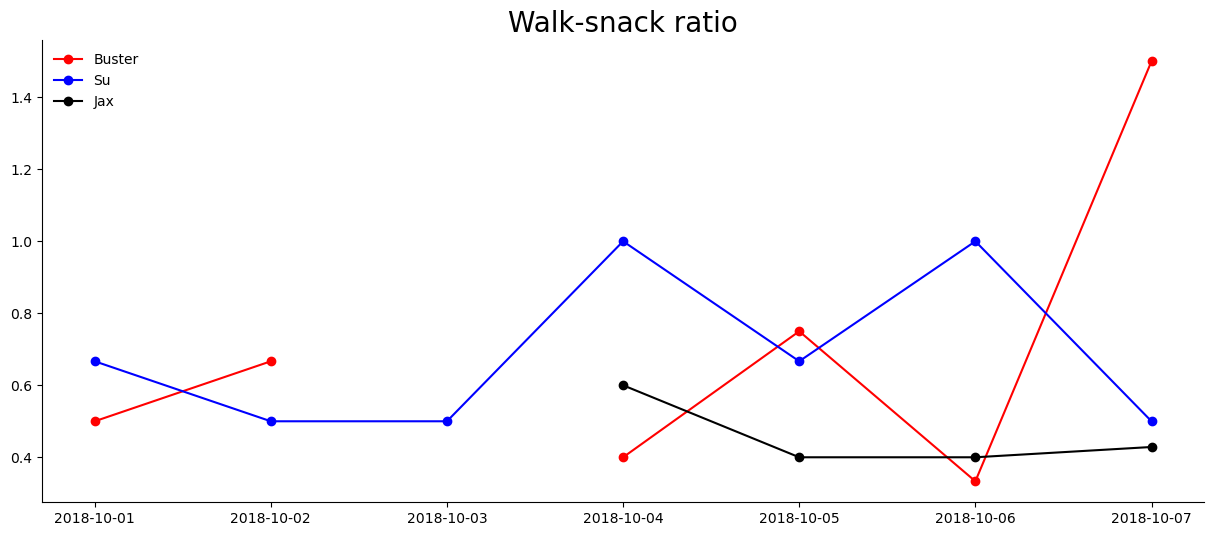

In [10]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(dogs_us.loc['Buster'].index, dogs_us.loc['Buster', 'ws_ratio'], color='red', marker = 'o', label='Buster')
ax.plot(dogs_us.loc['Su'].index, dogs_us.loc['Su', 'ws_ratio'], color='blue', marker = 'o', label='Su')
ax.plot(dogs_us.loc['Jax'].index, dogs_us.loc['Jax', 'ws_ratio'], color='black', marker = 'o', label='Jax')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Walk-snack ratio', fontsize=20)
ax.legend(frameon=False)

plt.show()

Looking at my code for this figure I see that I basically repeated the same code three times. Not good! I should automate the plotting or use a package like seaborn to automate it for me.  

```python
for dog, c in zip(['Buster', 'Su', 'Jax'], ['red', 'blue', 'black']):
    ax.plot(dogs_us.loc[dog].index, dogs_us.loc[dog, 'ws_ratio'], color=c, marker = 'o', label=dog)
```

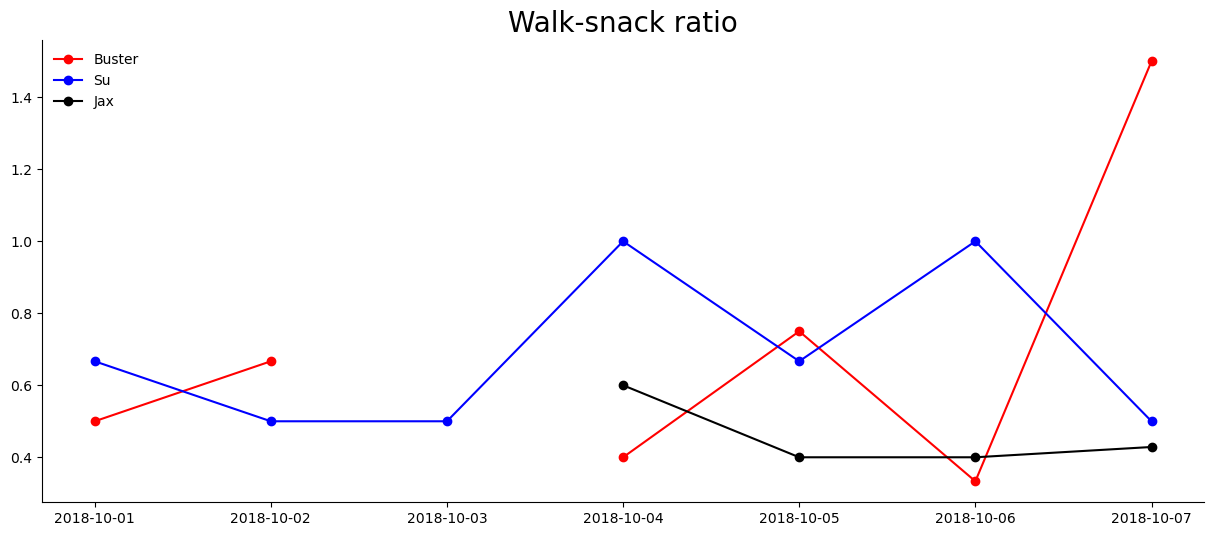

In [11]:
fig, ax = plt.subplots(figsize=(15,6))

for dog, c in zip(['Buster', 'Su', 'Jax'], ['red', 'blue', 'black']):
    ax.plot(dogs_us.loc[dog].index, dogs_us.loc[dog, 'ws_ratio'], color=c, marker = 'o', label=dog)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Walk-snack ratio', fontsize=20)
ax.legend(frameon=False)

plt.show()

## Stack
We can **stack the data** to put the variables back on the rows. 

When we stack the data, pandas defaults to dropping the NaNs, which saves space. We can override this if we choose with the `dropna=False` option. 


In [12]:
# stack() shifts the columns to rows. 
dogs_s = dogs_us.stack(dropna=True)       
dogs_s

dog     time        var     
Buster  2018-10-01  snacks      4.000000
                    walks       2.000000
                    ws_ratio    0.500000
        2018-10-02  snacks      3.000000
                    walks       2.000000
                    ws_ratio    0.666667
        2018-10-03  snacks      4.000000
        2018-10-04  snacks      5.000000
                    walks       2.000000
                    ws_ratio    0.400000
        2018-10-05  snacks      4.000000
                    walks       3.000000
                    ws_ratio    0.750000
        2018-10-06  snacks      3.000000
                    walks       1.000000
                    ws_ratio    0.333333
        2018-10-07  snacks      2.000000
                    walks       3.000000
                    ws_ratio    1.500000
Jax     2018-10-04  snacks      5.000000
                    walks       3.000000
                    ws_ratio    0.600000
        2018-10-05  snacks      5.000000
                    walks   

This is a Series object&mdash;it only has one column of data and the rest is the index.

Let's get this ready to save as long data, like it was when we read it in.

1. Reset the index to move them back to columns. Now we have a DataFrame rather than a Series.
2. Give the 'value' column a name. 

In [13]:
dogs_s = dogs_s.reset_index()
dogs_s.head()

dog       time       var    0
0  Buster 2018-10-01    snacks  4.0
1  Buster 2018-10-01     walks  2.0
2  Buster 2018-10-01  ws_ratio  0.5
3  Buster 2018-10-02    snacks  3.0
4  Buster 2018-10-02     walks  2.0

In [14]:
dogs_s.rename(columns={0 :'value'}, inplace=True)
dogs_s.head()

dog       time       var  value
0  Buster 2018-10-01    snacks    4.0
1  Buster 2018-10-01     walks    2.0
2  Buster 2018-10-01  ws_ratio    0.5
3  Buster 2018-10-02    snacks    3.0
4  Buster 2018-10-02     walks    2.0

In [15]:
# Now save it. 
dogs_s.to_csv('dog_data_updated.csv', index=False)  #index = False does not print the index

## Practice #1

Let's review multiIndexing with some real world data. The data are messy and will require some cleaning up and 'wrangling.'

We will work with the IMF's [World Economic Outlook](https://www.imf.org/external/pubs/ft/weo/2019/02/weodata/download.aspx), which contains historical data and the IMF's forecasts for many countries and variables. The file is the 'By Countries' file. Do not, however download it. Use the one that I have provided. Here's why:

* Even on the webpage, it says the file is **tab delimited**, yet, the file extension is 'xls'. If you tried to load it with `.read_excel()` it would not work. 
* There are a lot of missing values, header and footer hassles. I would expect you all to handle this stuff in a coding practice, but it would take too much in-class time.

To make our lives simpler, I turned the file into a csv file that is reasonably clean, but still has the wrong shape. If you want to know how to handle all of this directly in pandas drop me a line.   

The data are in the file 'WEOOct2021all.csv'.

There are two ways to do this practice. 

**The hard way.** The final DataFrame should have a row index with two levels: 'ISO' and the date. The column index should have three levels: 'Variable', 'Description', and 'Units'.

   You figure out how to get it that way.
   
**The less hard way.** Follow the steps below.  

Remember, the typical workflow is:

1. Set up the index
2. Stack or unstack

0. Load the file 'WEOOct2021all.csv' into a DataFrame. Check your dtypes. 

In [16]:
weo = pd.read_csv('WEOOct2021all.csv')
weo.head(2)

ISO Variable                               Description           Units  \
0  AFG  Surplus  General government net lending/borrowing  Percent of GDP   
1  AFG     Debt             General government gross debt  Percent of GDP   

   1980  1981  1982  1983  1984  1985  ...   2017   2018   2019   2020  2021  \
0   NaN   NaN   NaN   NaN   NaN   NaN  ... -0.673  1.634 -1.058 -2.243   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...  7.998  7.384  6.130  7.397   NaN   

   2022  2023  2024  2025  2026  
0   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN  

[2 rows x 51 columns]

In [17]:
weo.dtypes

ISO             object
Variable        object
Description     object
Units           object
1980           float64
1981           float64
1982           float64
1983           float64
1984           float64
1985           float64
1986           float64
1987           float64
1988           float64
1989           float64
1990           float64
1991           float64
1992           float64
1993           float64
1994           float64
1995           float64
1996           float64
1997           float64
1998           float64
1999           float64
2000           float64
2001           float64
2002           float64
2003           float64
2004           float64
2005           float64
2006           float64
2007           float64
2008           float64
2009           float64
2010           float64
2011           float64
2012           float64
2013           float64
2014           float64
2015           float64
2016           float64
2017           float64
2018           float64
2019       

1. Set the index to be 'Variable', 'ISO', 'Description', and 'Units'. Now the index will have everything in it that is not data.  (workflow step #1)
2. Stack the data. (workflow step #2)

In [18]:
weo = weo.set_index(['Variable', 'ISO', 'Description', 'Units'])
weo.head(2)

1980  \
Variable ISO Description                              Units                  
Surplus  AFG General government net lending/borrowing Percent of GDP   NaN   
Debt     AFG General government gross debt            Percent of GDP   NaN   

                                                                      1981  \
Variable ISO Description                              Units                  
Surplus  AFG General government net lending/borrowing Percent of GDP   NaN   
Debt     AFG General government gross debt            Percent of GDP   NaN   

                                                                      1982  \
Variable ISO Description                              Units                  
Surplus  AFG General government net lending/borrowing Percent of GDP   NaN   
Debt     AFG General government gross debt            Percent of GDP   NaN   

                                                                      1983  \
Variable ISO Description                              Units                  
Surplus  AFG General government net lending/borrowing Percent of GDP   NaN   
Debt     AFG General government gross debt            Percent of GDP   NaN   

                                                                      1984  \
Variable ISO Description                              Units                  
Surplus  AFG General government net lending/borrowing Percent of GDP   NaN   
Debt     AFG General government gross debt            Percent of GDP   NaN   

                                                                      1985  \
Variable ISO Description                              Units                  
Surplus  AFG General government net lending/borrowing Percent of GDP   NaN   
Debt     AFG General government gross debt            Percent of GDP   NaN   

                                                                      1986  \
Variable ISO Description                              Units                  
Surplus  AFG General government net lending/borrowing Percent of GDP   NaN   
Debt     AFG General government gross debt            Percent of GDP   NaN   

                                                                      1987  \
Variable ISO Description                              Units                  
Surplus  AFG General government net lending/borrowing Percent of GDP   NaN   
Debt     AFG General government gross debt            Percent of GDP   NaN   

                                                                      1988  \
Variable ISO Description                              Units                  
Surplus  AFG General government net lending/borrowing Percent of GDP   NaN   
Debt     AFG General government gross debt            Percent of GDP   NaN   

                                                                      1989  \
Variable ISO Description                              Units                  
Surplus  AFG General government net lending/borrowing Percent of GDP   NaN   
Debt     AFG General government gross debt            Percent of GDP   NaN   

                                                                      ...  \
Variable ISO Description                              Units           ...   
Surplus  AFG General government net lending/borrowing Percent of GDP  ...   
Debt     AFG General government gross debt            Percent of GDP  ...   

                                                                       2017  \
Variable ISO Description                              Units                   
Surplus  AFG General government net lending/borrowing Percent of GDP -0.673   
Debt     AFG General government gross debt            Percent of GDP  7.998   

                                                                       2018  \
Variable ISO Description                              Units                   
Surplus  AFG General government net lending/borrowing Percent of GDP  1.634   
Debt     AFG General government gross debt            Percent of GDP  7.384  

In [19]:
weo_s = weo.stack()
weo_s.head()

Variable  ISO  Description                               Units               
Surplus   AFG  General government net lending/borrowing  Percent of GDP  2002   -0.098
                                                                         2003   -2.102
                                                                         2004   -2.393
                                                                         2005   -0.965
                                                                         2006    0.643
dtype: float64

Great. Now are data are stacked, or long. Let's get the DataFrame into the shape we want: Observations in the row index and variables in the column index. 

3. Unstack 'Variable', 'Description', and 'Units', in that order. We want the variable names on the outermost level.

In [20]:
weo_us = weo_s.unstack(['Variable', 'Description', 'Units'])
weo_us.head(2)

Variable                                     Surplus  \
Description General government net lending/borrowing   
Units                                 Percent of GDP   
ISO                                                    
AFG 2002                                      -0.098   
    2003                                      -2.102   

Variable                             Debt  
Description General government gross debt  
Units                      Percent of GDP  
ISO                                        
AFG 2002                          345.977  
    2003                          270.602

We are almost ready to go. One problem remains...

4. Check the index. What kind of variable are the dates?
5. Reset the index and convert the dates to `datetime`.
6. Set the index back to the country name and year.

In [21]:
weo_us.index

MultiIndex([('AFG', '2002'),
            ('AFG', '2003'),
            ('AFG', '2004'),
            ('AFG', '2005'),
            ('AFG', '2006'),
            ('AFG', '2007'),
            ('AFG', '2008'),
            ('AFG', '2009'),
            ('AFG', '2010'),
            ('AFG', '2011'),
            ...
            ('ZWE', '2017'),
            ('ZWE', '2018'),
            ('ZWE', '2019'),
            ('ZWE', '2020'),
            ('ZWE', '2021'),
            ('ZWE', '2022'),
            ('ZWE', '2023'),
            ('ZWE', '2024'),
            ('ZWE', '2025'),
            ('ZWE', '2026')],
           names=['ISO', None], length=6808)

In [22]:
weo_us = weo_us.reset_index()

weo_us.head()

Variable     ISO level_1                                  Surplus  \
Description              General government net lending/borrowing   
Units                                              Percent of GDP   
0            AFG    2002                                   -0.098   
1            AFG    2003                                   -2.102   
2            AFG    2004                                   -2.393   
3            AFG    2005                                   -0.965   
4            AFG    2006                                    0.643   

Variable                             Debt  
Description General government gross debt  
Units                      Percent of GDP  
0                                 345.977  
1                                 270.602  
2                                 244.967  
3                                 206.356  
4                                  22.985

In [23]:
weo_us['level_1'] = pd.to_datetime(weo_us['level_1'])
weo_us = weo_us.set_index(['ISO', 'level_1'])
weo_us.head(3)

Variable                                        Surplus  \
Description    General government net lending/borrowing   
Units                                    Percent of GDP   
ISO level_1                                               
AFG 2002-01-01                                   -0.098   
    2003-01-01                                   -2.102   
    2004-01-01                                   -2.393   

Variable                                Debt  
Description    General government gross debt  
Units                         Percent of GDP  
ISO level_1                                   
AFG 2002-01-01                       345.977  
    2003-01-01                       270.602  
    2004-01-01                       244.967

## Practice #2: Try at home

The data are from [Zillow](https://www.zillow.com/research/data/). It is housing inventory by metro area&mdash;i.e., the number of unique listings that were active at any time in a given month.  

Now that you have had some practice, let's do this **the hard way.** 

1. The final DataFrame should have a row index with two levels: 'RegionName' and the date. The column index has only one level. 

   You figure out how to get it that way.
   
The data are in the file 'zillow.csv'

https://documenter.getpostman.com/view/9197254/UVsFz93V

In [25]:
# Step 0: load the data.
zill = pd.read_csv('zillow.csv')
zill.head(2)

RegionID  SizeRank     RegionName RegionType StateName  2018-03-31  \
0    102001         0  United States    country       NaN   1421529.0   
1    394913         1   New York, NY        msa        NY     73707.0   

   2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  2022-12-31  \
0   1500194.0   1592414.0   1660614.0   1709142.0  ...    955889.0   
1     80345.0     85864.0     90067.0     91881.0  ...     50400.0   

   2023-01-31  2023-02-28  2023-03-31  2023-04-30  2023-05-31  2023-06-30  \
0    884129.0    830977.0    835429.0    845834.0    880510.0    907228.0   
1     45916.0     42796.0     43253.0     44197.0     45829.0     46198.0   

   2023-07-31  2023-08-31  2023-09-30  
0    930911.0    950306.0    959171.0  
1     45506.0     43955.0     42485.0  

[2 rows x 72 columns]

In [26]:
# Step 1: Put the non-date columns in the index.
zill = zill.set_index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])
zill.head()

2018-03-31  \
RegionID SizeRank RegionName      RegionType StateName               
102001   0        United States   country    NaN         1421529.0   
394913   1        New York, NY    msa        NY            73707.0   
753899   2        Los Angeles, CA msa        CA            21998.0   
394463   3        Chicago, IL     msa        IL            38581.0   
394514   4        Dallas, TX      msa        TX            24043.0   

                                                        2018-04-30  \
RegionID SizeRank RegionName      RegionType StateName               
102001   0        United States   country    NaN         1500194.0   
394913   1        New York, NY    msa        NY            80345.0   
753899   2        Los Angeles, CA msa        CA            23784.0   
394463   3        Chicago, IL     msa        IL            42253.0   
394514   4        Dallas, TX      msa        TX            25876.0   

                                                        2018-05-31  \
RegionID SizeRank RegionName      RegionType StateName               
102001   0        United States   country    NaN         1592414.0   
394913   1        New York, NY    msa        NY            85864.0   
753899   2        Los Angeles, CA msa        CA            25605.0   
394463   3        Chicago, IL     msa        IL            45757.0   
394514   4        Dallas, TX      msa        TX            28225.0   

                                                        2018-06-30  \
RegionID SizeRank RegionName      RegionType StateName               
102001   0        United States   country    NaN         1660614.0   
394913   1        New York, NY    msa        NY            90067.0   
753899   2        Los Angeles, CA msa        CA            27109.0   
394463   3        Chicago, IL     msa        IL            47492.0   
394514   4        Dallas, TX      msa        TX            30490.0   

                                                        2018-07-31  \
RegionID SizeRank RegionName      RegionType StateName               
102001   0        United States   country    NaN         1709142.0   
394913   1        New York, NY    msa        NY            91881.0   
753899   2        Los Angeles, CA msa        CA            28811.0   
394463   3        Chicago, IL     msa        IL            48984.0   
394514   4        Dallas, TX      msa        TX            32408.0   

                                                        2018-08-31  \
RegionID SizeRank RegionName      RegionType StateName               
102001   0        United States   country    NaN         1733388.0   
394913   1        New York, NY    msa        NY            91252.0   
753899   2        Los Angeles, CA msa        CA            29874.0   
394463   3        Chicago, IL     msa        IL            49782.0   
394514   4        Dallas, TX      msa        TX            33567.0   

                                                        2018-09-30  \
RegionID SizeRank RegionName      RegionType StateName               
102001   0        United States   country    NaN         1723098.0   
394913   1        New York, NY    msa        NY            90050.0   
753899   2        Los Angeles, CA msa        CA            30428.0   
394463   3        Chicago, IL     msa        IL            49630.0   
394514   4        Dallas, TX      msa        TX            33512.0   

                                                        2018-10-31  \
RegionID SizeRank RegionName      RegionType StateName               
102001   0        United States   country    NaN         1701372.0   
394913   1        New York, NY    msa        NY            89340.0   
753899   2        Los Angeles, CA msa        CA            30606.0   
394463   3        Chicago, IL     msa        IL            48916.0   
394514   4        Dallas, TX      msa        TX            32589.0   

                                                        2018-11-30  \
RegionID SizeRank RegionName      RegionType StateName    

In [27]:
# Step 2: Stack it up. 
zill = zill.stack()
zill.head()

RegionID  SizeRank  RegionName     RegionType  StateName            
102001    0         United States  country     NaN        2018-03-31    1421529.0
                                                          2018-04-30    1500194.0
                                                          2018-05-31    1592414.0
                                                          2018-06-30    1660614.0
                                                          2018-07-31    1709142.0
dtype: float64

In [28]:
# Step 3: Reset the index. Convert dates to datetime,...

zill = zill.reset_index()

zill.rename(columns={'level_5':'Date'}, inplace=True)
zill['Date'] = pd.to_datetime(zill['Date'])

zill = zill.set_index(['RegionName', 'Date'])
zill = zill.sort_index()
zill.head(2)

RegionID  SizeRank RegionType StateName      0
RegionName   Date                                                      
Aberdeen, SD 2018-03-31    394297       677        msa        SD  189.0
             2018-04-30    394297       677        msa        SD  205.0

In [29]:
# Step 4: Give the column a reasonable name.

zill.rename(columns={0:'ForSaleInventory'}, inplace=True)
zill.head(2)

RegionID  SizeRank RegionType StateName  \
RegionName   Date                                                  
Aberdeen, SD 2018-03-31    394297       677        msa        SD   
             2018-04-30    394297       677        msa        SD   

                         ForSaleInventory  
RegionName   Date                          
Aberdeen, SD 2018-03-31             189.0  
             2018-04-30             205.0

2. Once you get your DataFrame in good shape, try plotting the inventory level for Madison, WI. What patterns do you notice? How does Madison compare to the United States as a whole?

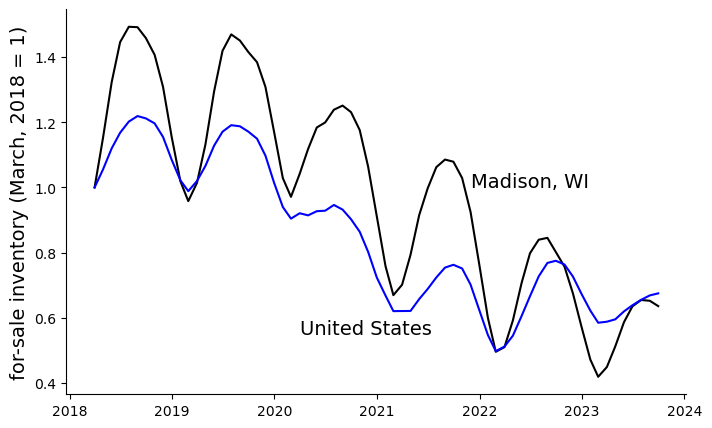

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
sns.despine()
ax.plot(zill.loc['Madison, WI'].index, 
        zill.loc['Madison, WI', 'ForSaleInventory']/zill.loc[('Madison, WI', '2018-03-31'), 'ForSaleInventory'], 
        color='black')

ax.plot(zill.loc['United States'].index, 
        zill.loc['United States', 'ForSaleInventory']/zill.loc[('United States', '2018-03-31'), 'ForSaleInventory'], 
        color='blue')

ax.set_ylabel('for-sale inventory (March, 2018 = 1)', fontsize=14)
ax.text(dt.datetime(2021, 12, 1), 1.0, 'Madison, WI', fontsize=14)
ax.text(dt.datetime(2020, 4, 1), 0.55, 'United States', fontsize=14)

plt.show()